In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fitting and Interpolating 

Compound interest calculator with annual contributions

* p = principal
* r = annual interest rate in percent
* y = year of the balance
* c = annual contribution (made at the start of the year)

$$\text{Balance}(y) = p(1 + r)^y + c\left[\frac{(1 + r)^{y+1} - (1 + r)}{r} \right]$$

In [2]:
def investment_balance(principal,rate,year,contribution):
    p = principal
    r = rate/100
    y = year
    c = contribution
    balance = p*(1 + r)**y + c*( ((1 + r)**(y+1) - (1 + r)) / r )
    return balance

In [3]:
ratesnp = np.linspace(1,25,25)

In [4]:
ratesnp

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [5]:
ib = investment_balance(1000,ratesnp,10,1000)

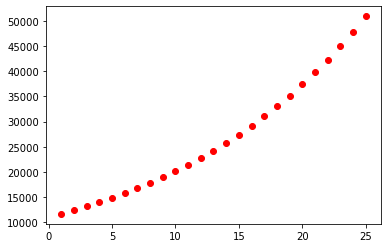

In [6]:
plt.plot(ratesnp,ib,'ro')

In [7]:
np.polyfit(ratesnp, ib, 3)

array([9.68449317e-01, 1.11578231e+01, 7.12885916e+02, 1.09010025e+04])

In [8]:
p = np.poly1d(np.polyfit(ratesnp, ib, 3))

In [9]:
p

poly1d([9.68449317e-01, 1.11578231e+01, 7.12885916e+02, 1.09010025e+04])

In [10]:
t = np.linspace(0, 25, 200)

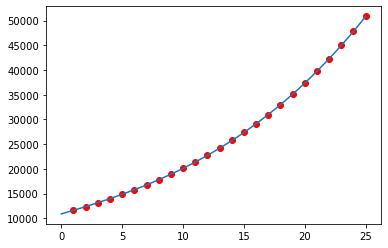

In [11]:
plt.plot(ratesnp,ib,'ro',t,p(t))

In [12]:
p.coef

array([9.68449317e-01, 1.11578231e+01, 7.12885916e+02, 1.09010025e+04])

In [13]:
def f(x):
    return 9.68449317e-01 * (x**3) + 1.11578231e+01 * (x**2) + 7.12885916e+02 * x + 1.09010025e+04

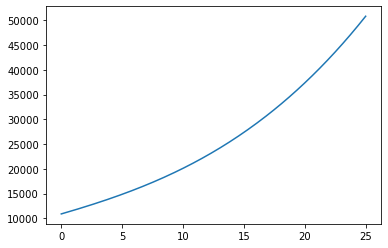

In [14]:
plt.plot(t,f(t))

In [15]:
import ipywidgets

In [16]:
def f(order=1):
    t = np.linspace(0, 25, 200)
    p = np.poly1d(np.polyfit(ratesnp, ib, order))
    plt.plot(ratesnp,ib,'ro',t,p(t))

ipywidgets.interact(f,order=(1,10))

interactive(children=(IntSlider(value=1, description='order', max=10, min=1), Output()), _dom_classes=('widget…

<function __main__.f(order=1)>

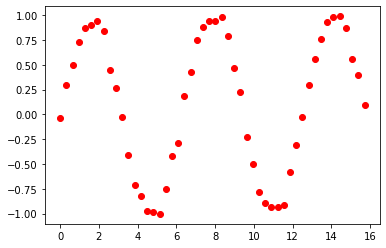

In [17]:
x = np.linspace(0,5*np.pi,50)
noise = (np.random.random(50)*2 - 1) * 0.1
y = np.sin(x) + noise
plt.plot(x,y,'ro')

In [18]:
def f(order=1):
    t = np.linspace(0, 5*np.pi, 200)
    p = np.poly1d(np.polyfit(x,y, order))
    plt.plot(x,y,'ro',t,p(t))

ipywidgets.interact(f,order=(1,10))

interactive(children=(IntSlider(value=1, description='order', max=10, min=1), Output()), _dom_classes=('widget…

<function __main__.f(order=1)>

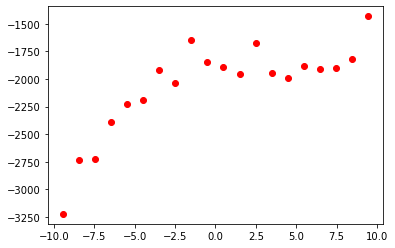

In [19]:
x = np.linspace(-3*np.pi,3*np.pi,20)
noise = (np.random.random(20)*2 - 10) * 200
y = x**3-6*x**2 + noise
plt.plot(x,y,'ro')

In [20]:
def f(order=1):
    p = np.poly1d(np.polyfit(x,y, order))
    t = np.linspace(-3*np.pi, 3*np.pi, 500)
    plt.plot(x,y,'ro',t,p(t))

ipywidgets.interact(f,order=(1,20))

interactive(children=(IntSlider(value=1, description='order', max=20, min=1), Output()), _dom_classes=('widget…

<function __main__.f(order=1)>

# On to SciPy

In [21]:
from scipy.optimize import curve_fit

In [22]:
# use the same data from above
x = np.linspace(-3*np.pi,3*np.pi,20)
noise = (np.random.random(20)*2 - 10) * 200
y = x**3-6*x**2 + noise

# must provide a model function, with independent variable as the first parameter
def m(x,a,b):
    return a + b*x

# call scipy's curve fitting routine
curve_fit(m,x,y)

# returns the parameters and the covariance for the estimated parameters

(array([-2005.72448846,    63.46038899]),
 array([[ 4.05203822e+03, -1.48858687e-06],
        [-1.48858687e-06,  1.23818870e+02]]))

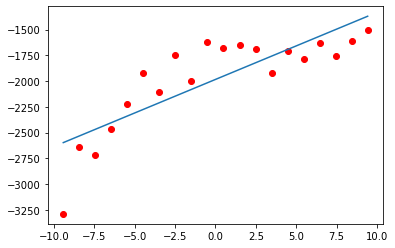

In [23]:
# use the same data from above
x = np.linspace(-3*np.pi,3*np.pi,20)
noise = (np.random.random(20)*2 - 10) * 200
y = x**3-6*x**2 + noise

# must provide a model function, with independent variable as the first parameter
def m(x,a,b):
    return a + b*x

# call scipy's curve fitting routine
c = curve_fit(m,x,y)

plt.plot(x,y,'ro',x,m(x,c[0][0],c[0][1]))

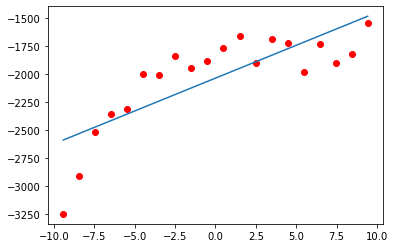

In [24]:
##
## EXERCISE -> change this so that the curve fit is for a 3rd order polynomial
##

# use the same data from above
x = np.linspace(-3*np.pi,3*np.pi,20)
noise = (np.random.random(20)*2 - 10) * 200
y = x**3-6*x**2 + noise

# must provide a model function, with independent variable as the first parameter
def m(x,a,b):
    return a + b*x

# call scipy's curve fitting routine
c = curve_fit(m,x,y)

plt.plot(x,y,'ro',x,m(x,c[0][0],c[0][1]))

In [25]:
# %load xercise-3curve.py

# Interpolation

In [26]:
from scipy import interpolate

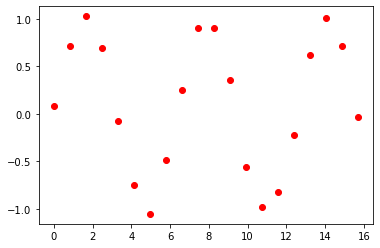

In [27]:
x = np.linspace(0,5*np.pi,20)
noise = (np.random.random(20)*2 - 1) * 0.1
y = np.sin(x) + noise
plt.plot(x,y,'ro')

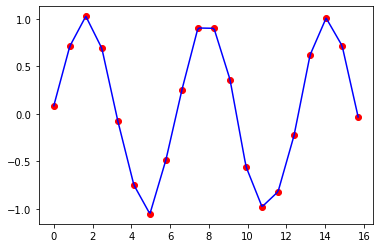

In [28]:
linear_interp = interpolate.interp1d(x, y)

xlin = np.linspace(0, 5*np.pi, 200)
ylin = linear_interp(xlin)

plt.plot(x,y,'ro')
plt.plot(xlin,ylin,'b-')

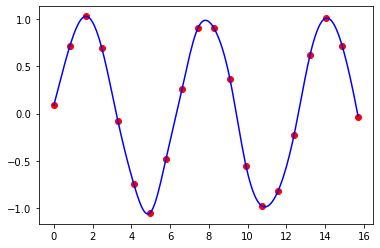

In [29]:
localinterp = interpolate.interp1d(x, y, 'cubic')

xlocal = np.linspace(0, 5*np.pi, 200)
ylocal = localinterp(xlocal)

plt.plot(x,y,'ro')
plt.plot(xlocal,ylocal,'b-')

In [30]:
interp_types = ['linear','nearest','zero','slinear',
                'quadratic','cubic','previous','next']

In [31]:
def plotinterp(kindin='linear'):

    localinterp = interpolate.interp1d(x, y, kind=kindin)

    xnew = np.linspace(0, 5*np.pi, 200)
    ynew = localinterp(xnew)

    plt.plot(x,y,'ro')
    plt.plot(xnew,ynew,'b-')
    plt.show()
    
ipywidgets.interact(plotinterp,kindin=interp_types)

interactive(children=(Dropdown(description='kindin', options=('linear', 'nearest', 'zero', 'slinear', 'quadrat…

<function __main__.plotinterp(kindin='linear')>

## Higher dimensions, and irregularly spaced points

In [32]:
def f(x,y):
    return np.sin(x) + np.cos(y)

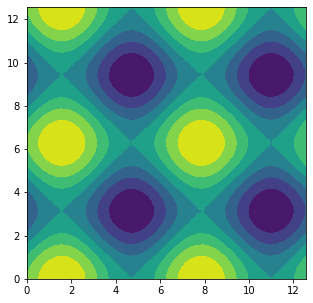

In [33]:
x = np.linspace(0,4*np.pi,50)
y = np.linspace(0,4*np.pi,50)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

fig,ax = plt.subplots(figsize=(5,5))
plt.contourf(X,Y,Z)

In [34]:
# "measured data"
xdata = np.random.uniform(0,4*np.pi,100)
ydata = np.random.uniform(0,4*np.pi,100)
zdata = f(xdata,ydata)

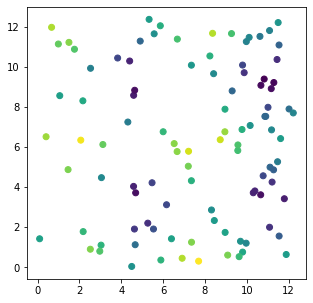

In [35]:
fig,ax = plt.subplots(figsize=(5,5))
plt.scatter(xdata, ydata, c=zdata)

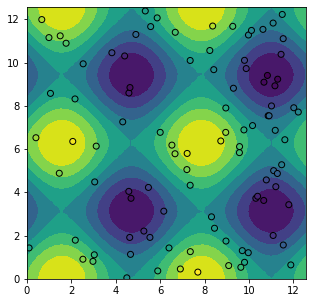

In [36]:
x = np.linspace(0,4*np.pi,50)
y = np.linspace(0,4*np.pi,50)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

fig,ax = plt.subplots(figsize=(5,5))
plt.contourf(X,Y,Z)
plt.scatter(xdata, ydata, c=zdata, edgecolors='k')

In [37]:
Zinterp = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')

In [38]:
Zinterp.shape

(50, 50)

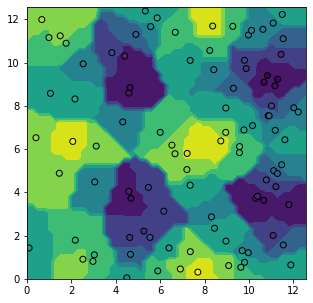

In [39]:
fig,ax = plt.subplots(figsize=(5,5))
plt.contourf(X,Y,Zinterp)
plt.scatter(xdata, ydata, c=zdata, edgecolors='k')

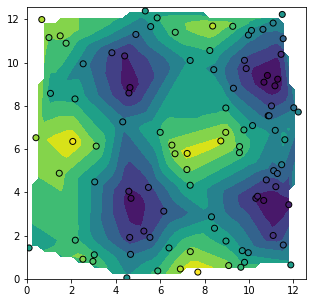

In [40]:
Zinterp = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
fig,ax = plt.subplots(figsize=(5,5))
plt.contourf(X,Y,Zinterp)
plt.scatter(xdata, ydata, c=zdata, edgecolors='k')

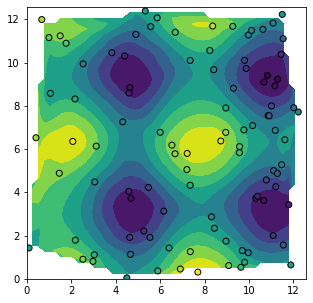

In [41]:
Zinterp = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
fig,ax = plt.subplots(figsize=(5,5))
plt.contourf(X,Y,Zinterp)
plt.scatter(xdata, ydata, c=zdata, edgecolors='k')

In [42]:
Zinterp[0][0]

nan